# 🏠 House Data Exploration
This notebook performs initial data exploration on the `house_data.csv` dataset.

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import getpass

In [2]:
%matplotlib inline

In [3]:
pd.set_option('display.max_columns',None)

# Import the Data

In [5]:
# Load the dataset

data_loc = Path(f'/home/ExraDrive/house_prices/raw_data')

df = pd.read_csv(data_loc /'train.csv')

# ℹ️ Display basic information about the dataset
print(f"📐 Dataset shape (rows, columns): {df.shape}")
print("\n📊 Dataset Info:")
print(df.info())


📐 Dataset shape (rows, columns): (1460, 81)

📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   obje

# Check for Missing Values per Column

In [6]:
# ❓ Checking for missing values to identify data quality issues
print("\n🔍 Missing values per column:")
print(df.isnull().sum())


🔍 Missing values per column:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


# Summary of Data

In [8]:
# 📈 Descriptive statistics like mean, std deviation, min, max, etc.
print("\n📋 Statistical Summary:")
print(df.describe())



📋 Statistical Summary:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.0

# Visualize data

/home/wwood/miniconda3/envs/ml_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


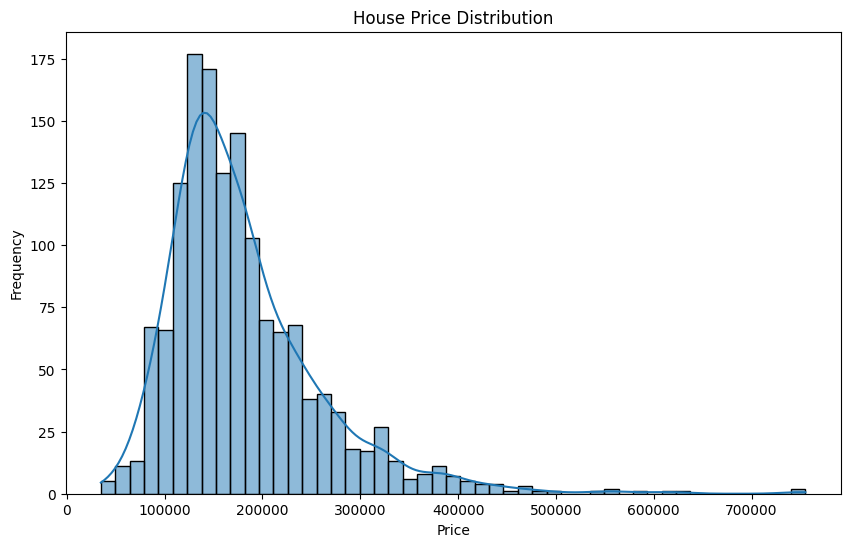

📊 Plotted house price distribution.


In [9]:
# 💰 Visualizing the distribution of house prices
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('House Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

print("📊 Plotted house price distribution.")

## Correlation Graph

Here check correlation of numericl features with Price

In [11]:
num_feats = ['LotFrontage','LotArea','TotalBsmtSF',
             '1stFlrSF','2ndFlrSF','GrLivArea','BedroomAbvGr','TotRmsAbvGrd','SalePrice']

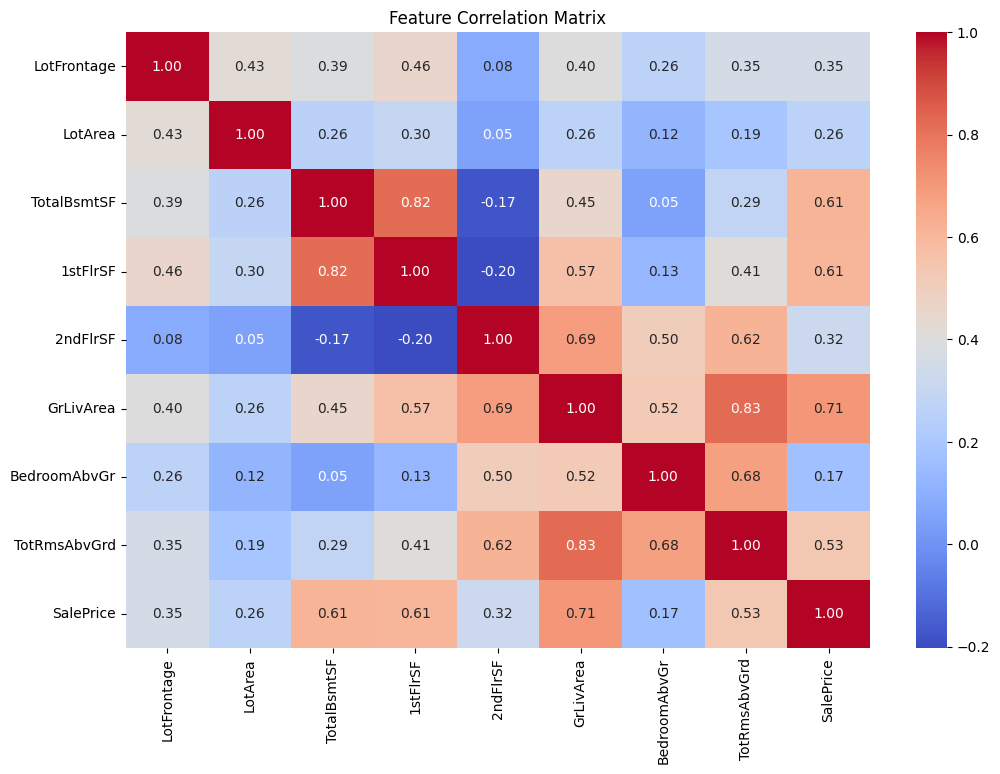

📈 Displayed feature correlation heatmap.


In [12]:
# 🔗 Checking how features are correlated with each other
plt.figure(figsize=(12, 8))
corr_df = df[num_feats]
correlation_matrix = corr_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

print("📈 Displayed feature correlation heatmap.")


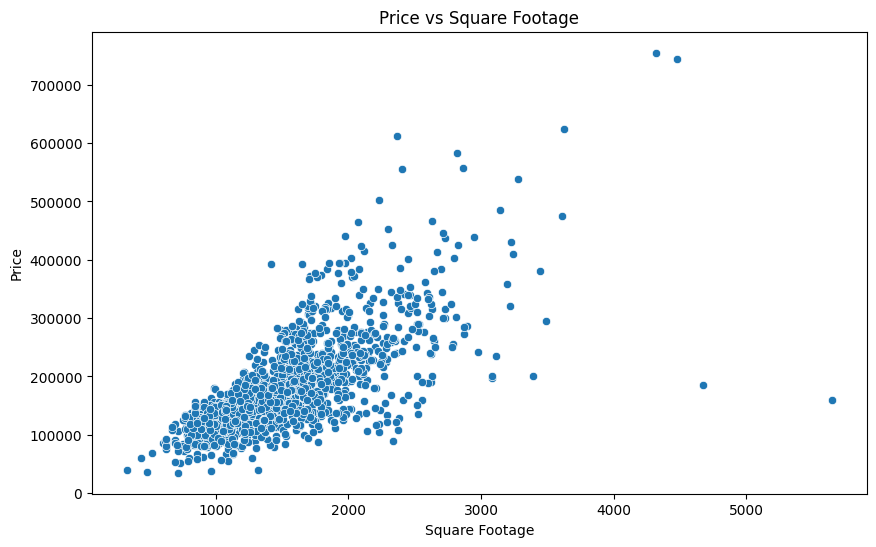

📐 Analyzed relation between square footage and price.


In [13]:
# 📏 Scatter plot to observe relationship between sqft and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('Price vs Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()

print("📐 Analyzed relation between square footage and price.")


## Bar Plots

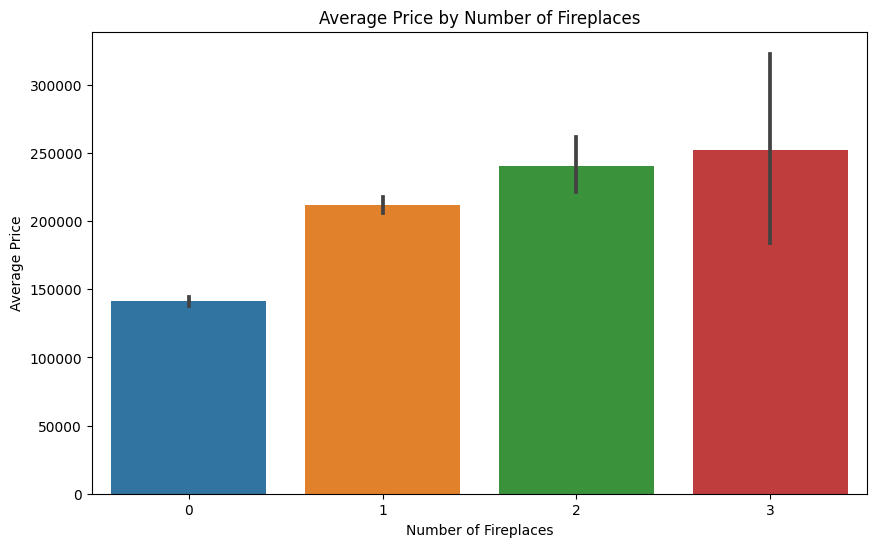

🛏️ Compared average prices based on fireplace count.


In [14]:
# 🛏️ Bar chart showing how average house price varies by bedroom count
plt.figure(figsize=(10, 6))
sns.barplot(x='Fireplaces', y='SalePrice', data=df)
plt.title('Average Price by Number of Fireplaces')
plt.xlabel('Number of Fireplaces')
plt.ylabel('Average Price')
plt.show()

print("🛏️ Compared average prices based on fireplace count.")


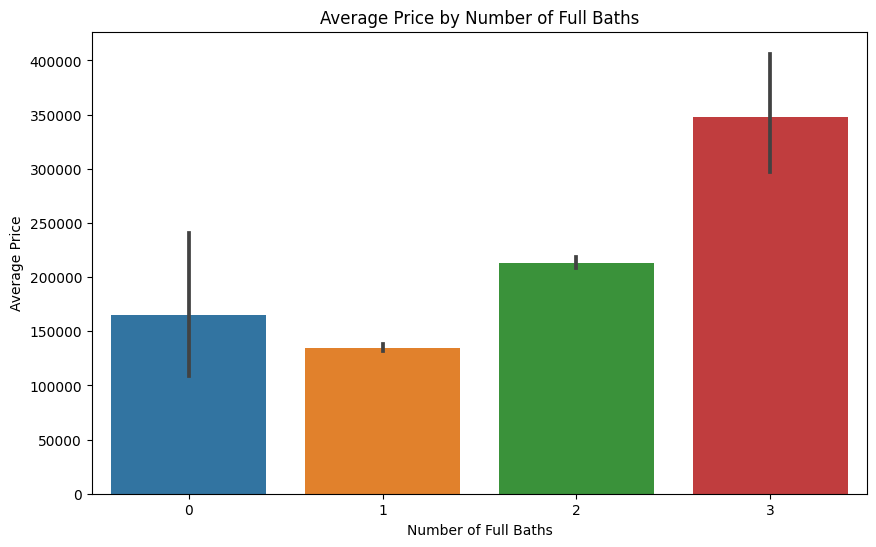

🛏️ Compared average prices based on full baths count.


In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='FullBath', y='SalePrice', data=df)
plt.title('Average Price by Number of Full Baths')
plt.xlabel('Number of Full Baths')
plt.ylabel('Average Price')
plt.show()

print("🛏️ Compared average prices based on full baths count.")

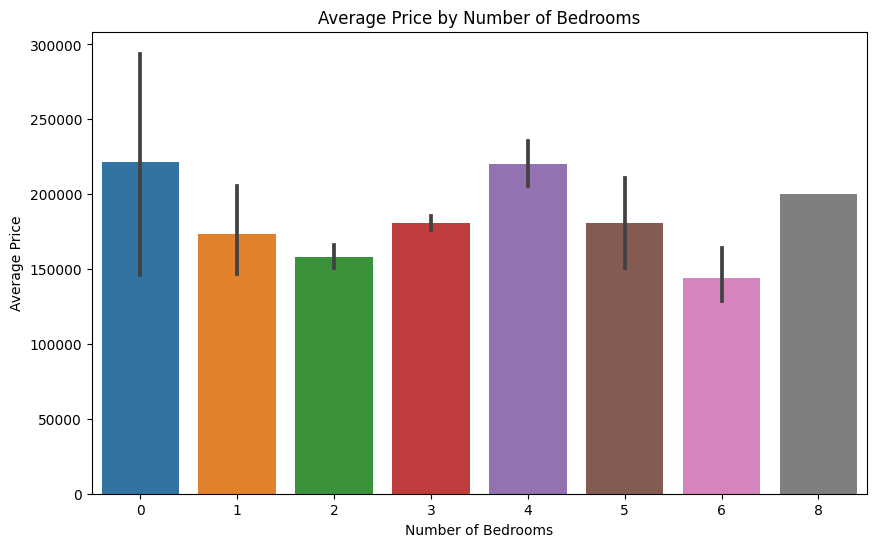

🛏️ Compared average prices based on bedroom count.


In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x='BedroomAbvGr', y='SalePrice', data=df)
plt.title('Average Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.show()

print("🛏️ Compared average prices based on bedroom count.")

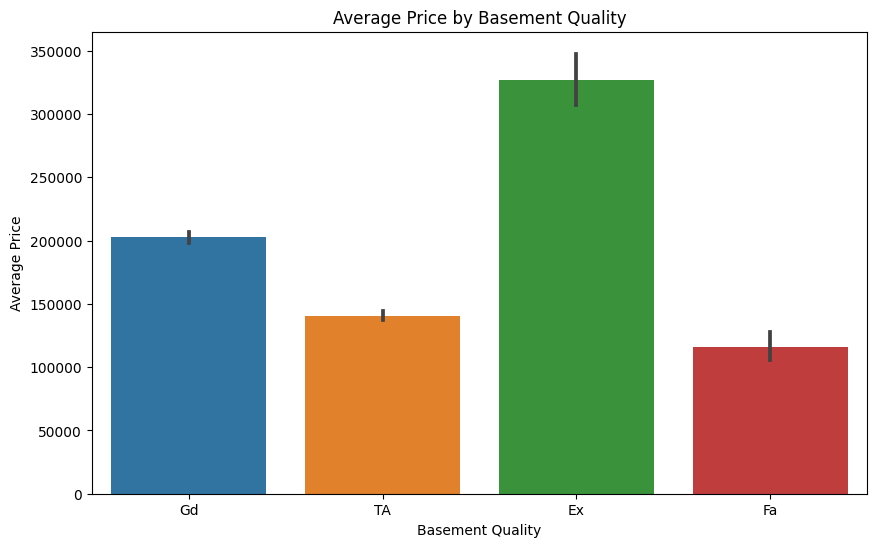

🛏️ Compared average prices based on fireplace count.


In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='BsmtQual', y='SalePrice', data=df)
plt.title('Average Price by Basement Quality')
plt.xlabel('Basement Quality')
plt.ylabel('Average Price')
plt.show()

print("🛏️ Compared average prices based on fireplace count.")

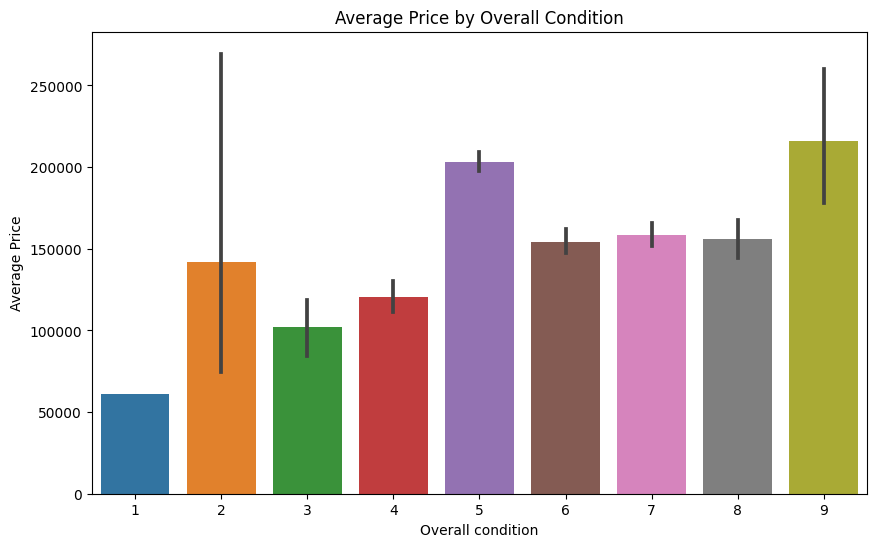

🛏️ Compared average prices based overall condition


In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x='OverallCond', y='SalePrice', data=df)
plt.title('Average Price by Overall Condition')
plt.xlabel('Overall condition')
plt.ylabel('Average Price')
plt.show()

print("🛏️ Compared average prices based overall condition")

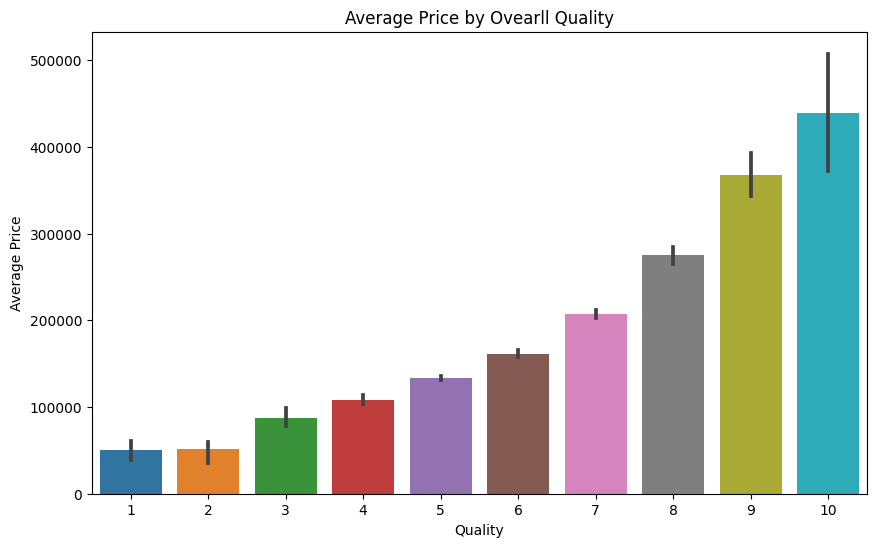

Compared average prices based on overall quality.


In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x='OverallQual', y='SalePrice', data=df)
plt.title('Average Price by Ovearll Quality')
plt.xlabel('Quality')
plt.ylabel('Average Price')
plt.show()

print("Compared average prices based on overall quality.")

# Next Step 
- Feature Engineering
- Create new features or modify existing ones
